In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-10-10 19:40:17.296346: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-10 19:40:17.333838: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-10 19:40:18.491839: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)

TensorFlow: 2.20.0
NumPy: 2.3.3


In [3]:
# Dense - Layer type; dense - fully connected layer
layer = Dense(units=1, name='output_layer', activation='linear')
# Sequential - type of ANN
model = Sequential([
    Input(shape=(1,), name='input_layer'),
    layer
])
## sgd - Stochastic Gradient Descent (optimization)
## mean_squared_error - mean squered error function
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

2025-10-10 19:40:25.836014: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
# y = 2x - 1
features = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype=float)
labels = 2 * features - 1

In [5]:
labels

array([-7., -5., -3., -1.,  1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.,
       19., 21., 23.])

In [6]:
features_train, features_temp, labels_train, labels_temp = train_test_split(
    features, labels, test_size=0.4, random_state=42
)

features_val, features_test, labels_val, labels_test = train_test_split(
    features_temp, labels_temp, test_size=0.5, random_state=42
)

print("=== DATASET STRUCTURE ===")
print(f"Training features:   {features_train}")
print(f"Training labels:     {labels_train}")
print(f"Validation features: {features_val}")
print(f"Validation labels:   {labels_val}")
print(f"Test features:       {features_test}")
print(f"Test labels:         {labels_test}")

=== DATASET STRUCTURE ===
Training features:   [ 6. -1. 12.  1.  4.  7.  9.  0.  3.]
Training labels:     [11. -3. 23.  1.  7. 13. 17. -1.  5.]
Validation features: [10. 11.  5.]
Validation labels:   [19. 21.  9.]
Test features:       [-3. -2.  8.  2.]
Test labels:         [-7. -5. 15.  3.]


In [7]:
# Training
#history = model.fit(features, labels, epochs=500)
history = model.fit(features_train, labels_train, validation_data=(features_val, labels_val), epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 205.6866 - mae: 11.2114 - val_loss: 27.9229 - val_mae: 4.9451
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.5168 - mae: 2.8310 - val_loss: 2.1343 - val_mae: 1.2503
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.3881 - mae: 1.0021 - val_loss: 0.3697 - val_mae: 0.5751
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7359 - mae: 0.7250 - val_loss: 0.1993 - val_mae: 0.4416
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6869 - mae: 0.7057 - val_loss: 0.1710 - val_mae: 0.4069
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6728 - mae: 0.6993 - val_loss: 0.1630 - val_mae: 0.3959
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6609 - mae: 0.6931 - val_loss: 0.1589 - val_mae: 0.3907
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6494 - mae: 0.6870 - val_loss: 0.1559 - val_mae: 0.3868
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6380 -

In [8]:
print(model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[18.9964]]


In [9]:
print("Here is what I learned: {}".format(layer.get_weights()))

Here is what I learned: [array([[1.9980816]], dtype=float32), array([-0.98441565], dtype=float32)]


In [10]:
predictions = model.predict(features)
weights = layer.get_weights()
w_learned, b_learned = weights
weights
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[-6.97866   ],
       [-4.980579  ],
       [-2.9824972 ],
       [-0.98441565],
       [ 1.0136659 ],
       [ 3.0117474 ],
       [ 5.009829  ],
       [ 7.0079107 ],
       [ 9.005992  ],
       [11.004073  ],
       [13.002155  ],
       [15.0002365 ],
       [16.99832   ],
       [18.9964    ],
       [20.994482  ],
       [22.992563  ]], dtype=float32)

In [11]:
w_actual, b_actual = 2.0, -1.0
w_error = abs(w_actual - w_learned[0][0]) / w_actual * 100
b_error = abs(b_actual - b_learned[0]) / abs(b_actual) * 100
total_accuracy = 100 - (w_error + b_error) / 2

In [12]:
print("=== MODEL RESULTS ===")
print(f"Learned weight: {w_learned[0][0]:.6f} (real: 2.000000)")
print(f"Learned bias: {b_learned[0]:.6f} (real: -1.000000)")
print(f"Weight accuracy: {100 - w_error:.2f}%")
print(f"Bias accuracy: {100 - b_error:.2f}%")
print(f"Average accuracy: {total_accuracy:.2f}%")
print(f"Final loss: {history.history['loss'][-1]:.6f}")

=== MODEL RESULTS ===
Learned weight: 1.998082 (real: 2.000000)
Learned bias: -0.984416 (real: -1.000000)
Weight accuracy: 99.90%
Bias accuracy: 98.44%
Average accuracy: 99.17%
Final loss: 0.000110


In [13]:
model.save('model.keras')

In [14]:
loaded_model = tf.keras.models.load_model('model.keras')

In [15]:
print("\n=== FINAL ESTIMATION TOP ON TEST DATA ===")
test_loss, test_mae = loaded_model.evaluate(features_test, labels_test, verbose=0)

print(f"Test data set loss: {test_loss:.6f}")
print(f"Test data average ... (MAE): {test_mae:.6f}")


=== FINAL ESTIMATION TOP ON TEST DATA ===
Test data set loss: 0.000243
Test data average ... (MAE): 0.013186


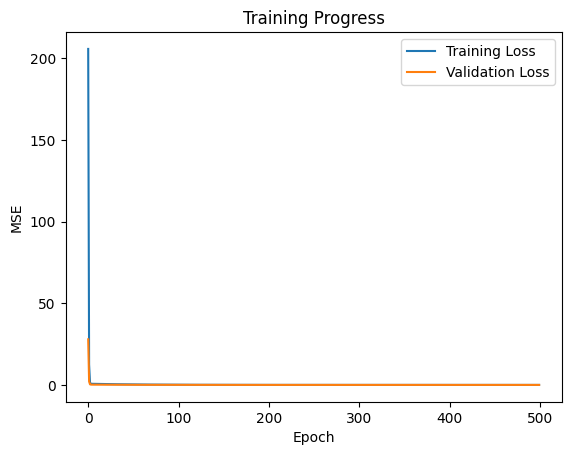

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Training Progress')
plt.show()